# 1-ое задание
---



In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
import pandas, seaborn, sklearn, random
from matplotlib import pyplot as plt
from itertools import combinations
from matplotlib import colors
import numpy as np

csv_table = pandas.read_csv('iris.data',header=None)
csv_table.rename(columns={0: 'sepal_length',1: 'sepal_width',2: 'petal_length',3: 'petal_width',4: 'class_flower'}, inplace=True)
df = pandas.DataFrame(csv_table)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class_flower
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# считаем корреляцию между признаками
features_correlations = df[['sepal_length','sepal_width','petal_length','petal_width']].corr()
features_visualize = features_correlations.style.background_gradient(cmap="Greys")
features_visualize.set_caption('Features correlations')

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


In [ ]:
# считаем корреляцию по классам

## 1
Iris_virginica_correlations = df.loc[df['class_flower'] == 'Iris-virginica'].corr()
Iris_virginica_visualize = Iris_virginica_correlations.style.background_gradient(cmap="Blues")
Iris_virginica_visualize.set_caption('Iris-virginica correlations')

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,0.457228,0.864225,0.281108
sepal_width,0.457228,1.000000,0.401045,0.537728
petal_length,0.864225,0.401045,1.000000,0.322108
petal_width,0.281108,0.537728,0.322108,1.000000


In [ ]:
## 2
Iris_versicolor_correlations = df.loc[df['class_flower'] == 'Iris-versicolor'].corr()
Iris_versicolor_visualize = Iris_versicolor_correlations.style.background_gradient(cmap="Greens")
Iris_versicolor_visualize.set_caption('Iris-versicolor correlations')

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,0.525911,0.754049,0.546461
sepal_width,0.525911,1.000000,0.560522,0.663999
petal_length,0.754049,0.560522,1.000000,0.786668
petal_width,0.546461,0.663999,0.786668,1.000000


In [ ]:
## 3
Iris_setosa_correlations = df.loc[df['class_flower'] == 'Iris-setosa'].corr()
Iris_setosa_visualize = Iris_setosa_correlations.style.background_gradient(cmap="Reds")
Iris_setosa_visualize.set_caption('Iris-setosa correlations')

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,0.746780,0.263874,0.279092
sepal_width,0.746780,1.000000,0.176695,0.279973
petal_length,0.263874,0.176695,1.000000,0.306308
petal_width,0.279092,0.279973,0.306308,1.000000


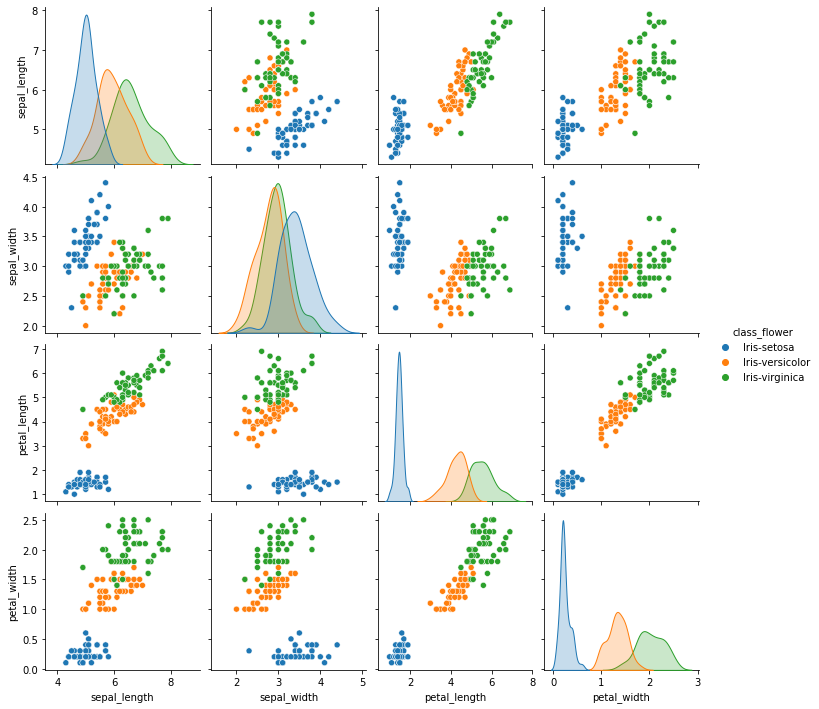

In [ ]:
# распределения классов на всех парах переменных

classes_distribution = seaborn.pairplot(df,hue='class_flower')
classes_distribution

**Выводы по первому заданию:** в зависимости от класса у различных пар переменных наблюдаются разные коэффициенты корреляции, например, у пары petal_width-petal_length высокий коэффициент корреляции на классе versicolor и в таблице корреляций по всем классам, но небольшое значение на классах virginica и setosa. Такие переменные имеют среднюю (по силе связи) линейную корреляционную зависимость (прямую или обратную (отриц. значения в таблице features correlations)).

# 2-ое задание
---






/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearDiscriminantAnalysis was fitted with feature names
  "X does not have valid feature names, but"


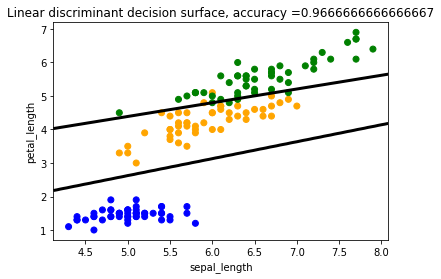

In [ ]:
# 1 sepal length - petal length

# линейный дискриминант

lda = LinearDiscriminantAnalysis()
X = df[['sepal_length','petal_length']]
Y = df[['class_flower']]
lda.fit(X,Y)
accuracy = lda.score(X,Y)
colours = {"Iris-setosa":'blue',"Iris-versicolor":'orange', "Iris-virginica":'green'}
samples = Y['class_flower']
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=[colours[samples] for samples in samples])

## гиперплоскость
nx, ny = 100, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),np.linspace(y_min, y_max, ny))
Z = lda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)

## визуализация
plt.contour(xx, yy, Z, [0.5], linewidths=3., colors='black')
plt.title('Linear discriminant decision surface, accuracy ='+str(accuracy))
plt.xlabel('sepal_length')
plt.ylabel('petal_length')
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


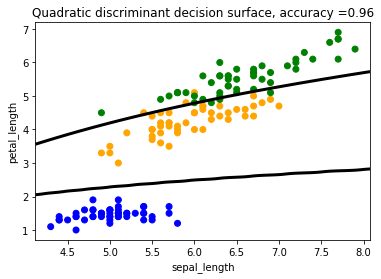

In [ ]:
# квадратичный дискриминант
qda = QuadraticDiscriminantAnalysis()
qda.fit(X,Y)
qda_accuracy = qda.score(X,Y)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=[colours[samples] for samples in samples])

## гиперплоскость
Z = qda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)

## визуализация
plt.contour(xx, yy, Z, [0.5], linewidths=3., colors='black')
plt.title('Quadratic discriminant decision surface, accuracy ='+str(qda_accuracy))
plt.xlabel('sepal_length')
plt.ylabel('petal_length')
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


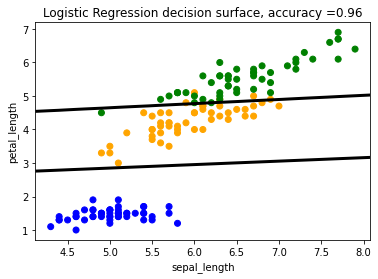

In [ ]:
# логистическая регрессия

log_reg = LogisticRegression(penalty='l1', solver='liblinear',max_iter=int(1e6),warm_start=True, intercept_scaling=10000.)
log_reg.fit(X,Y)
log_reg_accuracy = log_reg.score(X,Y)
plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=[colours[samples] for samples in samples])

## гиперплоскость
Z = log_reg.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)

## визуализация
plt.contour(xx, yy, Z, [0.5], linewidths=3., colors='black')
plt.title('Logistic Regression decision surface, accuracy ='+str(log_reg_accuracy))
plt.xlabel('sepal_length')
plt.ylabel('petal_length')
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


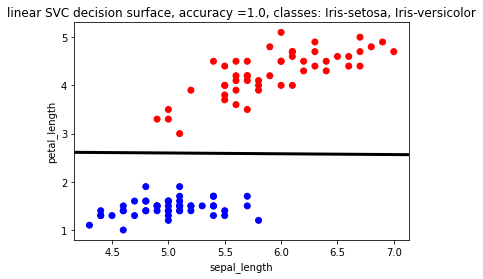

In [ ]:
# SVM линейное ядро

classes = ["Iris-setosa","Iris-versicolor", "Iris-virginica"]
combinations_classes_count = combinations(classes,2)
combinations_classes = list(combinations_classes_count)
def SVM_model_plot(two_classes, type):
  select_rows_one=df.loc[df['class_flower'] == two_classes[0]]
  select_rows_two=df.loc[df['class_flower'] == two_classes[1]]
  X1 = select_rows_one[['sepal_length','petal_length']]
  X2 = select_rows_two[['sepal_length','petal_length']]
  Y1 = select_rows_one[['class_flower']]
  Y2 = select_rows_two[['class_flower']]
  X = pandas.concat([X1,X2])
  Y = pandas.concat([Y1,Y2])
  samples = Y['class_flower']
  SVC_model = sklearn.svm.SVC(kernel = type)
  SVC_model.fit(X, Y)
  colours = {two_classes[0]:'blue', two_classes[1]:'red'}
  SVC_model_accuracy = SVC_model.score(X,Y)
  plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=[colours[samples] for samples in samples])

  ## гиперплоскость
  nx, ny = 100, 100
  x_min, x_max = plt.xlim()
  y_min, y_max = plt.ylim()
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),np.linspace(y_min, y_max, ny))
  xy = np.vstack([xx.ravel(), yy.ravel()]).T
  Z = SVC_model.decision_function(xy).reshape(xx.shape)

  ## визуализация
  plt.contour(xx, yy, Z, levels=[0], linewidths=3., colors='black')
  title = type+' SVC decision surface, accuracy ='+str(SVC_model_accuracy)+', classes: '+str(', '.join(two_classes))
  plt.title(title)
  plt.xlabel('sepal_length')
  plt.ylabel('petal_length')
  return plt

SVM_model_plot(combinations_classes[0],'linear').show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


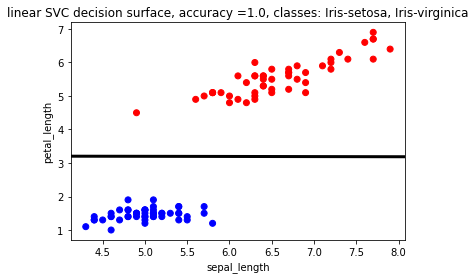

In [ ]:
SVM_model_plot(combinations_classes[1],'linear').show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


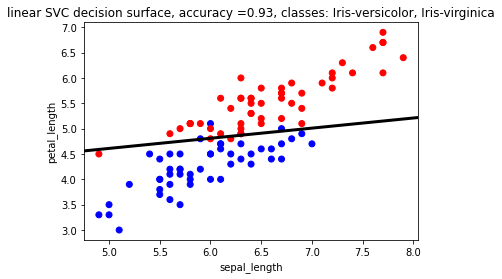

In [ ]:
SVM_model_plot(combinations_classes[2],'linear').show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


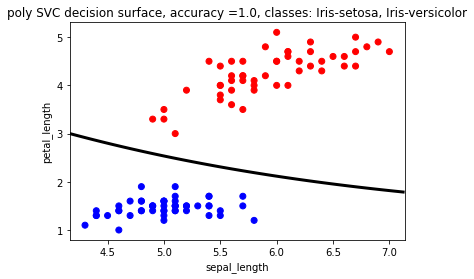

In [ ]:
# SVM квадратичное ядро

SVM_model_plot(combinations_classes[0],'poly').show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


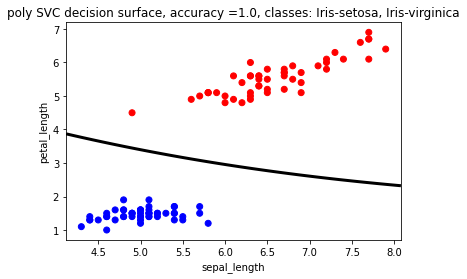

In [ ]:
SVM_model_plot(combinations_classes[1],'poly').show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


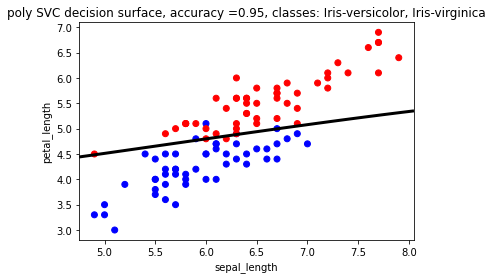

In [ ]:
SVM_model_plot(combinations_classes[2],'poly').show()

**Выводы по второму заданию:** среди представленных моделей наибольшие показатели accuracy были у методов линейного/квадратичного дискриминанта и логистической регрессии, а наименьшее значение показал метод полиномиального SVM для наименее разделяемых классов (Iris-versicolor, Iris-virginica).




# 3-е задание
---

2 наименее разделимых класса: Iris-versicolor и Iris-virginica.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy: 0.97


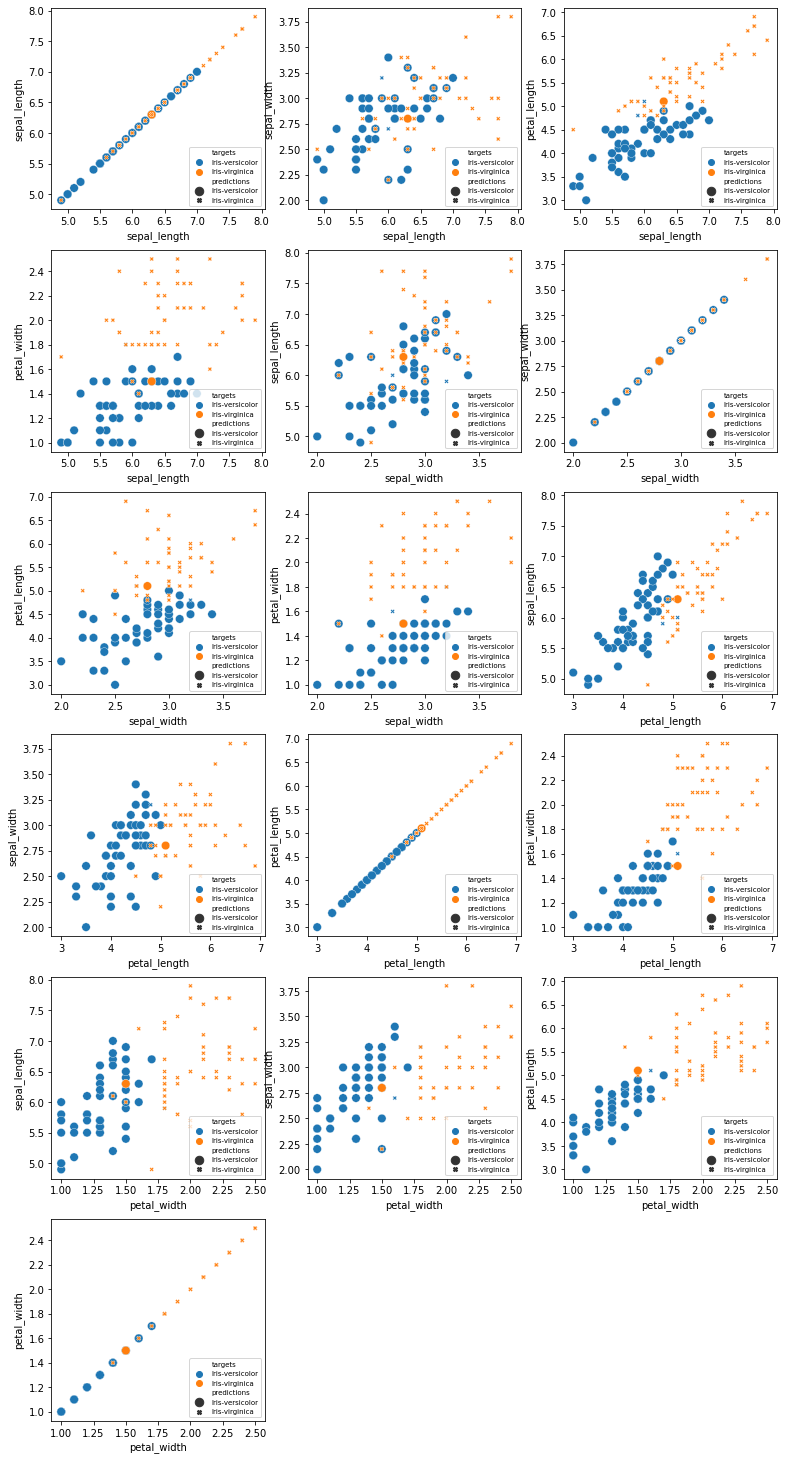

In [ ]:
select_rows_one=df.loc[df['class_flower'] == "Iris-versicolor"]
select_rows_two=df.loc[df['class_flower'] == "Iris-virginica"]
X1 = select_rows_one[['sepal_length','sepal_width','petal_length','petal_width']]
X2 = select_rows_two[['sepal_length','sepal_width','petal_length','petal_width']]
Y1 = select_rows_one[['class_flower']]
Y2 = select_rows_two[['class_flower']]
X = pandas.concat([X1,X2])
Y = pandas.concat([Y1,Y2])
lda = LinearDiscriminantAnalysis()
lda.fit(X, Y)
lda_all_features = lda.score(X,Y)
predictions = lda.predict(X)
predictions_and_targets = pandas.DataFrame({'predictions':predictions,'targets':Y['class_flower']})
all_data_df = X.join(predictions_and_targets) # переменные + метки классов + предсказанные алгоритмом метки

## визуализация
all_plots = plt.figure(figsize=(13, 26))
plot_number = 1
for i in range(4):
  for j in range(4):
      one_plot = all_plots.add_subplot(6, 3, plot_number)
      plot_number = plot_number + 1
      plt.sca(one_plot)
      seaborn.scatterplot(x=all_data_df.iloc[:, i], y = all_data_df.iloc[:, j],
        hue='targets',
        size='predictions',
        style='predictions',
        data=all_data_df,
        ax = one_plot);
      plt.legend(loc="lower right", fontsize=7)
print('Accuracy:',lda_all_features)

**Выводы по третьему заданию:** на полученных графиках можно наглядно увидеть, что метод линейного дискриминанта показывает высокую точность (accuracy = 0.97) на наименее разделяемых классах (Iris-versicolor, Iris-virginica).

# 4-ое задание

---



Классы Iris-versicolor, Iris-virginica; переменные 	sepal_length, petal_length.

In [ ]:
select_rows_one=df.loc[df['class_flower'] == 'Iris-versicolor']
select_rows_two=df.loc[df['class_flower'] == 'Iris-virginica']
X1 = select_rows_one[['sepal_length','petal_length']]
X2 = select_rows_two[['sepal_length','petal_length']]
Y1 = select_rows_one[['class_flower']]
Y2 = select_rows_two[['class_flower']]
X = pandas.concat([X1,X2])
Y = pandas.concat([Y1,Y2])

## библиотечная реализация и результат
qda = QuadraticDiscriminantAnalysis()
qda.fit(X, Y)
qda_tool_predictions = qda.predict(X)

## пользовательская реализация и результат
covMatrix_versicolor = np.cov((X1.to_numpy()).T)
covMatrix_virginica = np.cov((X2.to_numpy()).T)
versicolor_mean = np.mean(X1.to_numpy())
virginica_mean = np.mean(X2.to_numpy())
predictions_array = np.ndarray(shape=(100, 1)) # массив для результатов пользовательской реализации qda
for i in range(100):
  Q1 = np.dot(np.dot((X.to_numpy()[i] - versicolor_mean).T, np.linalg.inv(covMatrix_versicolor)), (X.to_numpy()[i] - versicolor_mean))
  Q2 = np.dot(np.dot((X.to_numpy()[i] - virginica_mean).T, np.linalg.inv(covMatrix_virginica)), (X.to_numpy()[i] - virginica_mean))
  l0 = (Q2 - Q1) / 2 + (np.log((np.linalg.det(covMatrix_versicolor)**.5)/((np.linalg.det(covMatrix_virginica))**.5)))
  if((l0 > 0 and l0 < 0.0001) or (l0 < 0 and l0 > -0.0001)):
    predictions_array[i] = 0
  elif(l0 > 0.0001):
    predictions_array[i] = 2
  else:
    predictions_array[i] = 1

## сравнение результатов
samples = Y['class_flower']
numbers = {'Iris-versicolor':2,'Iris-virginica':1}
Y_true = [numbers[i] for i in Y['class_flower']] # правильные метки
library_predictions = [numbers[i] for i in qda_tool_predictions] # метки библиотеки
user_algoritm_predictions = [int(i[0]) for i in predictions_array] # метки пользовательского алгоритма
library_mistakes = 0 # количество ошибок библиотеки
user_algoritm_mistakes = 0 # количество ошибок пользовательского алгоритма
for i,j in zip(Y_true,library_predictions):
  if i != j:
    library_mistakes += 1
for i,j in zip(Y_true,user_algoritm_predictions):
  if i != j:
    user_algoritm_mistakes += 1

## визуализация
colours = {'Iris-versicolor':'red','Iris-virginica':'blue'}
plt.scatter(X['sepal_length'], X['petal_length'], c=[colours[y] for y in Y['class_flower']])
h = 0.01
x_min = X['sepal_length'].min() - 0.5
x_max = X['sepal_length'].max() + 0.5
y_min = X['petal_length'].min() - 0.5
y_max = X['petal_length'].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
xy = np.c_[xx.ravel(), yy.ravel()]
m, n = xy.shape
predictions_array_for_plot = np.ndarray(shape=(m, 1))
for i in range(m):
  Q1 = np.dot(np.dot((xy[i] - versicolor_mean).T, np.linalg.inv(covMatrix_versicolor)), (xy[i] - versicolor_mean))
  Q2 = np.dot(np.dot((xy[i] - virginica_mean).T, np.linalg.inv(covMatrix_virginica)), (xy[i] - virginica_mean))
  l0 = (Q2 - Q1) / 2 + (np.log((np.linalg.det(covMatrix_versicolor)**.5)/((np.linalg.det(covMatrix_virginica))**.5)))
  if((l0 > 0 and l0 < 0.0001) or (l0 < 0 and l0 > -0.0001)):
    predictions_array_for_plot[i] = 0
  elif(l0 > 0.0001):
    predictions_array_for_plot[i] = 2
  else:
    predictions_array_for_plot[i] = 1


predictions_array_for_plot = predictions_array_for_plot.reshape(xx.shape)
plt.contourf(xx, yy, predictions_array_for_plot, alpha = 0.3)
plt.title('Custom quadratic discriminant, library mistakes = '+str(library_mistakes) + ', custom algoritm mistakes = '+str(user_algoritm_mistakes))
plt.xlabel('sepal_length')
plt.ylabel('petal_length')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


**Выводы по четвертому заданию:** самостоятельно реализованный метод квадратичного дискриминантного анализа на наименее разделяемых классах (Iris-versicolor, Iris-virginica) показывает худшие результаты, чем библиотечный (23 ошибки против 6).

In [ ]:
len(Y_true) - sklearn.metrics